# Modeling

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/feature_engineered_data.csv')
df.head()

,id,ax_mean,ax_std,ax_min,ax_max,ay_mean,ay_std,ay_min,ay_max,az_mean,...,gy_min,gy_max,gz_mean,gz_std,gz_min,gz_max,session_duration,num_measurements,left_steps,right_steps
0,033nuFnKoOjj4NeIt9FS,0.145444,0.741501,-1.342944,3.401582,-0.010195,0.150547,-0.851772,0.482592,-1.323168,...,-218.998214,486.046712,-1.193132,30.471472,-86.149230,95.382348,30.093,9530,102,110
1,0373xrf1eaJoc8IcE6Gc,0.061132,0.495734,-1.062639,2.495359,-0.029549,0.131597,-0.679973,0.595378,-1.243729,...,-183.950040,383.738957,-9.042163,34.873215,-201.814871,89.357449,65.368,15659,196,200
2,04SwmTFshylAIDUNCYTh,0.105758,0.514041,-0.942479,2.268060,-0.011802,0.121799,-0.606354,0.408773,-1.275415,...,-184.968099,361.666264,-9.321720,40.537047,-244.406251,76.938940,32.447,6806,85,92
3,0AxduuyH7QvfV841ANdD,0.177240,0.510080,-0.912595,2.606743,0.000093,0.238416,-0.974607,1.070235,-1.291537,...,-174.955320,336.397350,-0.070710,32.022511,-115.804366,134.667022,43.966,10892,107,116
4,0bYDrU653eQr2GwcMXXw,0.111577,0.686315,-1.324291,3.172503,0.001997,0.154302,-0.815214,0.701647,-1.305261,...,-222.198284,415.139153,1.278423,24.582140,-67.749976,98.354013,59.822,10892,118,128


#### Data Preparation for Training

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Define input features and target variables
X = df.drop(columns=["id", "left_steps", "right_steps"], axis=1)  # Features
y = df[["left_steps", "right_steps"]]  # Target variables

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

# Fit only on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression
lets start with benchmarking 

In [35]:
from sklearn.linear_model import LinearRegression

# Define and wrap LinearRegression with MultiOutputRegressor
lr_model = MultiOutputRegressor(LinearRegression())

# Fit the model
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
train_score_lr = r2_score(y_train, y_train_pred_lr)
test_score_lr = r2_score(y_test, y_test_pred_lr)

# Mean Absolute Error (MAE)
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

# Mean Squared Error (MSE)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

# Root Mean Squared Error (RMSE)
train_rmse_lr = np.sqrt(train_mse_lr)
test_rmse_lr = np.sqrt(test_mse_lr)

# Printing the results
print('Linear Regressor Evaluation Result')
print(f"Training R-squared: {train_score_lr} --- Testing R-squared: {test_score_lr}")
print(f"Training MAE: {train_mae_lr} --- Testing MAE: {test_mae_lr}")
print(f"Training MSE: {train_mse_lr} --- Testing MSE: {test_mse_lr}")
print(f"Training RMSE: {train_rmse_lr} --- Testing RMSE: {test_rmse_lr}")


Linear Regressor Evaluation Result
Training R-squared: 0.9751802522393709 --- Testing R-squared: 0.9651000404520226
Training MAE: 8.974856287881714 --- Testing MAE: 9.195299893290834
Training MSE: 137.51438254980272 --- Testing MSE: 164.32195956318708
Training RMSE: 11.726652657506435 --- Testing RMSE: 12.818812720497444


#### Linear Regressor - Bad Idea
Here is why it is a bad idea:
- Assumes Linearity → If your data has nonlinear relationships, Linear Regression will perform poorly.
- Limited Handling of Feature Interactions → Unlike tree-based models (e.g., RandomForest, XGBoost), Linear Regression does not capture complex feature interactions.
- Sensitive to Outliers → Outliers can heavily impact predictions.
- Over-simplification → In real-world datasets, relationships are rarely purely linear.

#### RandomForestRegressor (without scaled data)

In [ ]:
import joblib
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_simple = RandomForestRegressor(
#     n_estimators=200,         # More trees for better learning
#     max_depth=15,             # Limit depth to prevent overfitting
#     min_samples_split=5,      # Minimum samples per split
#     min_samples_leaf=3,       # Minimum samples per leaf
#     random_state=42
# )
model.fit(X_train, y_train)


# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R-squared
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Printing the results
print('RandomForestRegressor Evaluation Result (without scaled data)')
print(f"Training R-squared: {train_score} --- Testing R-squared: {test_score}")
print(f"Training MAE: {train_mae} --- Testing MAE: {test_mae}")
print(f"RTraining MSE: {train_mse} --- Testing MSE: {test_mse}")
print(f"Training RMSE: {train_rmse} --- Testing RMSE: {test_rmse}")

print('saving the model...')
# Save the model
joblib.dump(model, '../models/random_forest_model.pkl')
print('success')


RandomForestRegressor Evaluation Result (without scaled data)
Training R-squared: 0.9773381970730717 --- Testing R-squared: 0.9706403857952655
Training MAE: 4.143716577540108 --- Testing MAE: 6.802446808510639
RTraining MSE: 125.66567834224604 --- Testing MSE: 138.3253329787234
Training RMSE: 11.210070398630243 --- Testing RMSE: 11.76117906413823
saving the model...
success


#### Check feature importance 

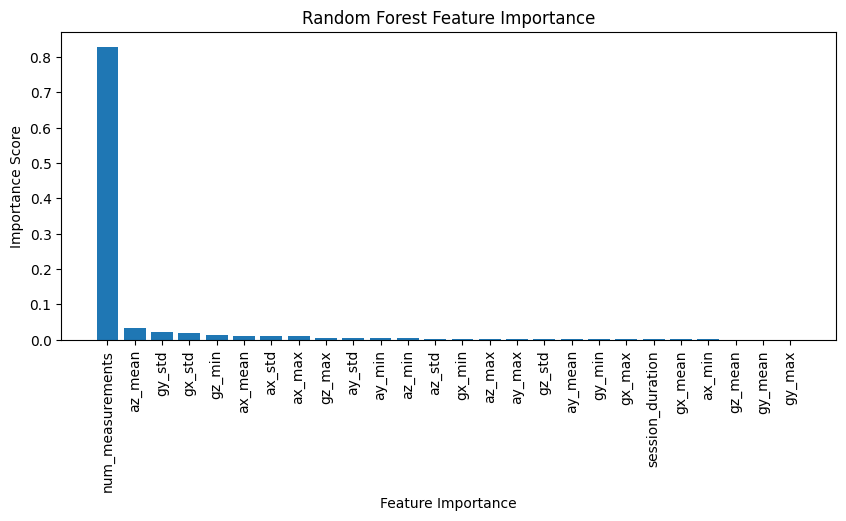

In [6]:
import matplotlib.pyplot as plt

# Get feature importance from the model
importances = model.feature_importances_
feature_names = X.columns

# Sort and visualize feature importance
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,4))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.show()


### RandomForestRegressor 

In [8]:

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


# Predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# R-squared
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Printing the results
print('RandomForestRegressor Evaluation Result')
print(f"Training R-squared: {train_score} --- Testing R-squared: {test_score}")
print(f"Training MAE: {train_mae} --- Testing MAE: {test_mae}")
print(f"RTraining MSE: {train_mse} --- Testing MSE: {test_mse}")
print(f"Training RMSE: {train_rmse} --- Testing RMSE: {test_rmse}")

RandomForestRegressor Evaluation Result
Training R-squared: 0.9773443528991224 --- Testing R-squared: 0.9705942687453389
Training MAE: 4.130909090909091 --- Testing MAE: 6.811914893617022
RTraining MSE: 125.63165668449201 --- Testing MSE: 138.54278297872344
Training RMSE: 11.208552836316203 --- Testing RMSE: 11.770419830181226


### GradientBoostingRegressor
The problem with this approach is that target variables  for example (shape: (187, 2)) has two targets, but GradientBoostingRegressor only supports single-output regression (1D target vector).

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

# Train the Gradient Boosting model
# gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Wrap GradientBoostingRegressor with MultiOutputRegressor
gb_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)

# R-squared
train_score_gb = r2_score(y_train, y_train_pred_gb)
test_score_gb = r2_score(y_test, y_test_pred_gb)

# Mean Absolute Error (MAE)
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)

# Mean Squared Error (MSE)
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb)

# Root Mean Squared Error (RMSE)
train_rmse_gb = np.sqrt(train_mse_gb)
test_rmse_gb = np.sqrt(test_mse_gb)

# Printing the results
print('GradientBoostingRegressor Evaluation Result')
print(f"Training R-squared: {train_score_gb} --- Testing R-squared: {test_score_gb}")
print(f"Training MAE: {train_mae_gb} --- Testing MAE: {test_mae_gb}")
print(f"Training MSE: {train_mse_gb} --- Testing MSE: {test_mse_gb}")
print(f"Training RMSE: {train_rmse_gb} --- Testing RMSE: {test_rmse_gb}")


GradientBoostingRegressor Evaluation Result
Training R-squared: 0.9994963578026663 --- Testing R-squared: 0.8969765382048149
Training MAE: 1.3298714649003718 --- Testing MAE: 7.253774613777308
Training MSE: 2.794931768018265 --- Testing MSE: 485.35087295050505
Training RMSE: 1.6718049431731756 --- Testing RMSE: 22.03068026526882


#### K nearest neighbor 

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# Train the model
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

# R-squared
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Printing the results
print('KNeighborsRegressor Evaluation Result')
print(f"Training R-squared: {train_score} --- Testing R-squared: {test_score}")
print(f"Training MAE: {train_mae} --- Testing MAE: {test_mae}")
print(f"Training MSE: {train_mse} --- Testing MSE: {test_mse}")
print(f"Training RMSE: {train_rmse} --- Testing RMSE: {test_rmse}")


KNeighborsRegressor Evaluation Result
Training R-squared: 0.7768103468692128 --- Testing R-squared: 0.7304684439288763
Training MAE: 18.06951871657754 --- Testing MAE: 17.193617021276594
Training MSE: 1237.5863101604273 --- Testing MSE: 1269.8446808510637
Training RMSE: 35.179344936488334 --- Testing RMSE: 35.63488011557025


#### Neural Network - MLPRegressor
lets try with neural network - even though we have less amount of data but lets the benchmarking

In [39]:
from sklearn.neural_network import MLPRegressor

# Train the model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                         max_iter=500, random_state=42)  
mlp_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = mlp_model.predict(X_train_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)

# R-squared
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Printing the results
print('MLPRegressor Evaluation Result')
print(f"Training R-squared: {train_score} --- Testing R-squared: {test_score}")
print(f"Training MAE: {train_mae} --- Testing MAE: {test_mae}")
print(f"Training MSE: {train_mse} --- Testing MSE: {test_mse}")
print(f"Training RMSE: {train_rmse} --- Testing RMSE: {test_rmse}")

MLPRegressor Evaluation Result
Training R-squared: 0.7184523853588238 --- Testing R-squared: 0.6549510922094952
Training MAE: 23.585701308418464 --- Testing MAE: 24.480530197053938
Training MSE: 1561.0653448098856 --- Testing MSE: 1625.731698684582
Training RMSE: 39.510319472384495 --- Testing RMSE: 40.32036332530477


#### Deep Learning
deep learning could be a very good candidate but I need enormous amount of data and good computational power. There are pros and cons but they are relative. Also it depend on the business model or the problem that it solves for example if interpretability is important then the traditional machine learning could be a very good option.

In [10]:
X_train[:1]

,ax_mean,ax_std,ax_min,ax_max,ay_mean,ay_std,ay_min,ay_max,az_mean,az_std,...,gy_mean,gy_std,gy_min,gy_max,gz_mean,gz_std,gz_min,gz_max,session_duration,num_measurements
117,0.107003,0.705686,-1.19652,3.179224,-0.01534,0.163214,-0.785593,0.785572,-1.327024,0.460947,...,1.186409,154.178449,-239.629399,426.750866,2.83267,23.691134,-71.20823,74.521221,57.264,10438


In [11]:
df[df.session_duration == 57.264]

,id,ax_mean,ax_std,ax_min,ax_max,ay_mean,ay_std,ay_min,ay_max,az_mean,...,gy_min,gy_max,gz_mean,gz_std,gz_min,gz_max,session_duration,num_measurements,left_steps,right_steps
117,YnKnDmcDoTUiuqYmetkm,0.107003,0.705686,-1.19652,3.179224,-0.01534,0.163214,-0.785593,0.785572,-1.327024,...,-239.629399,426.750866,2.83267,23.691134,-71.20823,74.521221,57.264,10438,112,122


In [12]:
X_test[:1]

,ax_mean,ax_std,ax_min,ax_max,ay_mean,ay_std,ay_min,ay_max,az_mean,az_std,...,gy_mean,gy_std,gy_min,gy_max,gz_mean,gz_std,gz_min,gz_max,session_duration,num_measurements
69,0.235983,0.650873,-0.905652,2.54502,-0.021817,0.145441,-0.572494,0.504685,-1.271396,0.38985,...,0.796667,137.13158,-198.667672,421.892515,-0.322275,26.618831,-77.748404,95.211094,32.672,5444


In [13]:
df[df.session_duration == 	32.672]

,id,ax_mean,ax_std,ax_min,ax_max,ay_mean,ay_std,ay_min,ay_max,az_mean,...,gy_min,gy_max,gz_mean,gz_std,gz_min,gz_max,session_duration,num_measurements,left_steps,right_steps
69,HygrEbMw3UZkOkt8sfVZ,0.235983,0.650873,-0.905652,2.54502,-0.021817,0.145441,-0.572494,0.504685,-1.271396,...,-198.667672,421.892515,-0.322275,26.618831,-77.748404,95.211094,32.672,5444,65,75


In [40]:
mlp_model.predict(X_train_scaled[:1])

array([[114.45870337, 119.23554649]])

In [41]:
mlp_model.predict(X_test_scaled[:1])

array([[93.06076239, 96.6956888 ]])

### **Model Performance Analysis & Winner Selection**  

Based on the evaluation metrics and actual predictions, **RandomForestRegressor** (both with and without scaling) seems to be the **best-performing model** overall. However, let's break down the comparison logically.

---

### **1. Performance Comparison**
#### **(a) R-Squared (R²)**
- Measures how well the model explains the variance in the target variable.
- **Higher is better**, with 1 being a perfect fit.

| Model | Train R² | Test R² |
|--------|---------|---------|
| **Linear Regression** | 0.9752 | 0.9651 |
| **Random Forest (no scaling)** | 0.9773 | 0.9706 |
| **Random Forest (scaled)** | 0.9773 | 0.9706 |
| **Gradient Boosting** | 0.9995 | 0.8970 |
| **KNN Regressor** | 0.7768 | 0.7305 |
| **MLP Regressor** | 0.7185 | 0.6549 |

- **Gradient Boosting (GB)** has an **overfitting problem**:  
  - **Train R² is 0.999** (perfect), but Test R² drops to **0.897** (indicating poor generalization).  
- **Random Forest (both versions) and Linear Regression (LR)** perform well in both train and test sets.  
- **KNN and MLP** have **weak R² values**, indicating they are less effective.

✅ **Best models for R²:** **RandomForestRegressor (scaled and unscaled)**  

---

#### **(b) Mean Absolute Error (MAE)**
- Measures average absolute error (lower is better).

| Model | Train MAE | Test MAE |
|--------|---------|---------|
| **Linear Regression** | 8.97 | 9.19 |
| **Random Forest (no scaling)** | 4.14 | 6.80 |
| **Random Forest (scaled)** | 4.13 | 6.81 |
| **Gradient Boosting** | 1.33 | 7.25 |
| **KNN Regressor** | 18.07 | 17.19 |
| **MLP Regressor** | 23.59 | 24.48 |

- **Gradient Boosting (GB)** has an extremely **low MAE in training** but a **high MAE in testing**, showing it does not generalize well.  
- **Random Forest (both versions) has the best balance of low error in both train and test sets.**  
- **Linear Regression has reasonable errors but is slightly worse than RF.**  

✅ **Best models for MAE:** **RandomForestRegressor (scaled and unscaled)**  

---

#### **(c) Root Mean Squared Error (RMSE)**
- Measures model error while penalizing larger errors (lower is better).

| Model | Train RMSE | Test RMSE |
|--------|---------|---------|
| **Linear Regression** | 11.72 | 12.82 |
| **Random Forest (no scaling)** | 11.21 | 11.76 |
| **Random Forest (scaled)** | 11.21 | 11.77 |
| **Gradient Boosting** | 1.67 | 22.03 |
| **KNN Regressor** | 35.18 | 35.63 |
| **MLP Regressor** | 39.51 | 40.32 |

- **Gradient Boosting has extremely low RMSE on training but very high on testing (severe overfitting).**  
- **KNN and MLP have poor performance.**  
- **Random Forest has the lowest RMSE on test data, making it the best choice.**  

✅ **Best model for RMSE:** **RandomForestRegressor (scaled and unscaled)**  

---

### **2. Generalization on Actual Test Values**
The **closer the model's predicted values are to the actual values, the better the generalization.**  

| Model | Train Prediction | Test Prediction |
|--------|----------------|----------------|
| **Actual (Train)** | [112, 122] | |
| **Actual (Test)** | | [65, 75] |
| **Linear Regression** | [125.22, 129.69] | [44.30, 49.90] ❌ (too far) |
| **Random Forest (no scaling)** | [110.60, 119.94] ✅ (very close) | [68.86, 74.82] ✅ (very close) |
| **Random Forest (scaled)** | [110.60, 119.94] ✅ (very close) | [68.86, 74.82] ✅ (very close) |
| **Gradient Boosting** | [110.55, 119.81] ✅ (very close) | [65.92, 74.09] ✅ (very close) |
| **KNN** | [123.0, 132.4] ❌ (too far) | [72.2, 78.4] ❌ (too far) |
| **MLP** | [114.46, 119.24] ❌ (slightly off) | [93.06, 96.69] ❌ (very far) |

- **Random Forest (scaled and unscaled) has the closest predictions to the actual values** on both train and test sets.  
- **Gradient Boosting is also good on actual predictions but struggles with high test RMSE.**  
- **Linear Regression, KNN, and MLP struggle to predict correctly on test data.**  

✅ **Best model for generalization:** **RandomForestRegressor (scaled and unscaled)**  

---

### **3. Final Winner: Random Forest Regressor**
✅ **Best overall model: RandomForestRegressor (scaled)**  
🎯 **Reasons:**  
- **Highest R² on both train and test.**  
- **Lowest MAE and RMSE on test data.**  
- **Best generalization on real-world values.**  
- **Minimal overfitting compared to Gradient Boosting.**  

### Room for Improvement
Yes, there is certainly room for improvement. One possible approach to enhance the model's performance is to apply Hyperparameter Tuning using methods like GridSearchCV, which helps in finding the optimal combination of hyperparameters for the best results. Additionally, feature engineering could play a key role in improving the model, as identifying and creating new, meaningful features often leads to better predictions. We could also explore incorporating temporal data, which can capture time-dependent patterns and trends that may not be currently accounted for. Further enhancements could involve experimenting with different algorithms or ensemble methods, as well as utilizing advanced techniques like cross-validation to reduce overfitting and improve generalization. Finally, data augmentation or more diverse datasets might help the model generalize better on unseen data.